# Red Wine Regression

In [86]:
# necessary imports 
import os
import pandas as pd
import numpy as np
import math

from scipy.optimize import minimize 

In [122]:
# read the file 
os.chdir('C:\\Users\mil_kry\Desktop')
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Next, we are going to create the training sets and the test sets.

In [50]:
# shuffle the dataset 
df = df.sample(frac=1)

# split the data into features and class
df_features = df.drop('quality', axis=1)
df_class = df['quality']

# perform train-test split
split_point = math.floor(len(df)*0.8)

X_train, y_train = df_features[:split_point], df_class[:split_point]
X_test, y_test = df_features[split_point:], df_class[split_point:]

# convert the datasets to np.array
X_train, y_train = X_train.to_numpy(), y_train.to_numpy()
X_test, y_test = X_test.to_numpy(), y_test.to_numpy()

print('X_train shape: {}, y_train shape: {}, X_test shape: {}, y_test shape {}'
      .format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train shape: (1279, 11), y_train shape: (1279,),X_test shape: (320, 11), y_test shape (320,)


# Regression Equations and Functions
Given a vector $X = (X_{1}, X_{2}, ..., X_{n})$ where $n$ is the number of features and $\beta$, 
the estimated value of $y$ is given by $\hat{y} = \sum_{i=1}^{n} \beta_{i}X_{i}$.

Given $m$ samples $X^{(1)}, ..., X^{(m)}$, $RSS = \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^2 
 = \sum_{j=1}^{m} (y^{(j)} - \sum_{i=1}^{n} \beta_{i}X_{i}^{(j)})^2 $. 

In [51]:
# method for estimating y
def estimate_y(β, X):
    """
    :type β: np.array
    :type X: np.array
    :rtype: np.array
    """
    return np.sum(β*X, axis=1)

# method for computing RSS
def RSS(β, X, y):
    """
    :type β: np.array
    :type X: np.array
    :type y: np.array
    :rtype: np.float64
    """
    y_hat = estimate_y(β, X)
    rss = np.sum((y-y_hat)**2)
    return rss

# Optimizing the model

In [52]:
# initialize β
initial_β = np.random.normal(0, 1, X_train.shape[1])

# fit the data using minimize from scipy
res = minimize(fun=RSS, x0=initial_β, args=(X_train,y_train))

print('res.fun: ', res.fun)
print('res.x:', res.x)
print('training set RSS:', RSS(res.x, X_train, y_train))
print('test set RSS:', RSS(res.x, X_test, y_test))

res.fun:  539.5924177437923
res.x: [-3.46160773e-03 -1.07802120e+00 -1.53704807e-01  9.62448748e-03
 -2.17181542e+00  3.16213117e-03 -3.11939467e-03  4.55377190e+00
 -5.39044869e-01  1.00221859e+00  3.00160117e-01]
training set RSS: 539.5924177437923
test set RSS: 128.15144765114803


In [53]:
# construct a table of weights sorted by abs(weight) DESC
pd.DataFrame(res.x, df.columns[:-1], columns={'weight'}).sort_values(by='weight', key= lambda x:abs(x), ascending=False)

,weight
density,4.553772
chlorides,-2.171815
volatile acidity,-1.078021
sulphates,1.002219
pH,-0.539045
alcohol,0.300160
citric acid,-0.153705
residual sugar,0.009624
fixed acidity,-0.003462
free sulfur dioxide,0.003162


# Results from the First Model
The table above shows the features and their corresponding weights. Observe that the features with the highest absolute weight are density, chlorides, volatile acidity, and sulphates. Thus they seem to be the most important ones given no further investigation.

The magnitude of features in this model shouldn't matter much as the weights of the features would rescale to the magnitude of the features and perform almost identically to the original model.

The RSS on the test set is 128.15. Thus the mean sqaured error is 128.15/len(y_test) = 0.40 and root mean square error is 0.63. So approximately every prediction on the test set is off by 0.63. 

If we change the initial value of β, the results won't change. Similarly, changing the initial magnitude of β won't affect the results. The following code gives two examples. 

In [54]:
# initialize β to all 0s
initial_β = [0 for i in range(X_train.shape[1])]
res = minimize(fun=RSS, x0=initial_β, args=(X_train,y_train))
print(initial_β)
print('res.fun:',res.fun)

# initialize β to a larger magnitude
initial_β = np.random.normal(10, 10, X_train.shape[1])
res = minimize(fun=RSS, x0=initial_β, args=(X_train,y_train))
print(initial_β)
print('res.fun:', res.fun)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
res.fun: 539.5924177437333
[  4.83649688  13.65446534  14.35133946 -18.37003083  10.33030271
   9.57356697   8.32564587  -0.65032041  11.17761685  11.0575306
  -5.0573691 ]
res.fun: 539.5924177437963


The choice of solver, however, does influence the RSS. 

In [55]:
# pick 8 solvers
solver_lst = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'L-BFGS-B', 'TNC', 
             'COBYLA','SLSQP']

for solver in solver_lst:
    print('{}:'.format(solver), minimize(fun=RSS, x0=initial_β, args=(X_train,y_train), method=solver).fun)

Nelder-Mead: 64103.83070252783
Powell: 539.6024762482493
CG: 539.9381973882678
BFGS: 539.5924177437963
L-BFGS-B: 539.6008381187216
TNC: 26158.014903288327
COBYLA: 530465.0221243631
SLSQP: 539.5924179577619


Taking a look at the printed information, 3 out of 8 solvers output extremely high RSS while the remaining solvers seem to be consistent with our first result.

# Regularizing the model

In [95]:
# method for ridge regression
def RSS_Ridge(β, X, y, λ):
    """
    :type β: np.array
    :type X: np.array
    :type y: np.array
    :type λ: numpy.float64
    :rtype: np.float64
    """
    # compute y_hat 
    y_hat = estimate_y(β, X)
    # compute rss_ridge
    rss_L2 = RSS(β, X, y) + λ * np.sum(β**2)
    return rss_L2

# method for lasso regression
def RSS_Lasso(β, X, y, λ):
    """
    :type β: np.array
    :type X: np.array
    :type y: np.array
    :type λ: numpy.float64
    :rtype: np.float64
    """
    # compute y_hat 
    y_hat = estimate_y(β, X)
    # compute rss_lasso
    rss_L1 = RSS(β, X, y) + λ * np.sum(abs(β))
    return rss_L1

# method for searching for the best lambda on the test set 
def search_best_λ(cost_function, λ_list):
    """
    :type cost_function: function
    :type λ_list: list
    :rtype: tuple
    """
    train_lst_L2 = []
    test_lst_L2 = []
    for λ in λ_list:
        res = minimize(fun=cost_function, x0=initial_β, args=(X_train,y_train,λ))
        test_lst_L2.append(RSS(res.x, X_test, y_test))
        train_lst_L2.append(RSS(res.x, X_train, y_train))
        
    # find the best λ
    min_index = np.argmin(test_lst_L2)
    
    # return the best λ, the best RSS on test set, the RSS list on train set, the RSS list on test set
    return round(λ_list[min_index],2), test_lst_L2[min_index], train_lst_L2, test_lst_L2

In [115]:
# create a list of λ to tune 
λ_lst = list(np.arange(0.01,1,0.05)) + list(np.arange(1,10,0.5))

# Train a model using Ridge Regression
best_λ_L1, best_RSS_L2, train_lst_L2, test_lst_L2 = search_best_λ(RSS_Ridge, λ_lst)

print('best_λ_L1: ', best_λ_L1)
print('best_RSS_L2: ', best_RSS_L2)

best_λ_L1:  0.16
best_RSS_L2:  127.9975020693176


Note that the best λ is 0.16 and the corresponding RSS is 128.00, which is slightly better than the original RSS 128.15. Now let's plot the RSS on the training set and the test set.

Text(0.5, 0, 'λ')

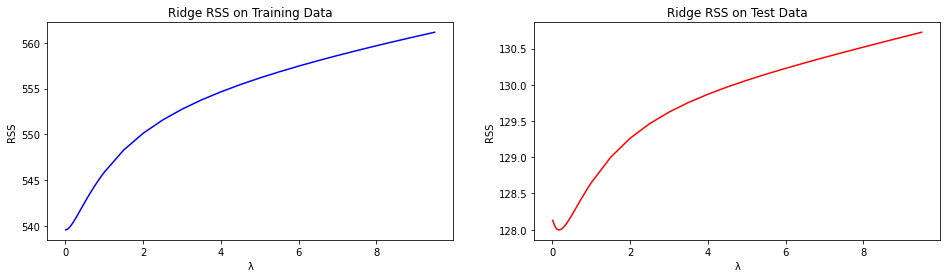

In [116]:
# plot the RSS_L2 on the training data
plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
plt.plot(λ_lst, train_lst_L2, color='blue')
#plt.plot(λ_lst, test_lst_L2,label='test RSS')
plt.title('Ridge RSS on Training Data')
plt.ylabel('RSS')
plt.xlabel('λ')

# plot the RSS_L2 on the test data
plt.subplot(1, 2, 2)
plt.plot(λ_lst, test_lst_L2, color='red')
plt.title('Ridge RSS on Test Data')
plt.ylabel('RSS')
plt.xlabel('λ')

Observe that the RSS on the training data increased steadily, whereas the RSS on the test data first reached a local minimum and then went on to a steady increase. Next we'll do the same thing for Lasso Regression.

In [117]:
# Train a model using Lasso Regression
best_λ_L1, best_RSS_L1, train_lst_L1, test_lst_L1 = search_best_λ(RSS_Lasso, λ_lst)

print('best_λ_L1: ', best_λ_L1)
print('best_RSS_L1: ', best_RSS_L1)

D:\anaconda\lib\site-packages\scipy\optimize\optimize.py:1058: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


best_λ_L1:  1.5
best_RSS_L1:  127.83086974244273


Note that the best λ is 1.5 and the corresponding RSS is 127.83, which is slightly better than the original RSS 128.15 and the best RSS from Ridge Regression which is 128.00. Now let's plot the RSS on the training set and the test set.

Text(0.5, 0, 'λ')

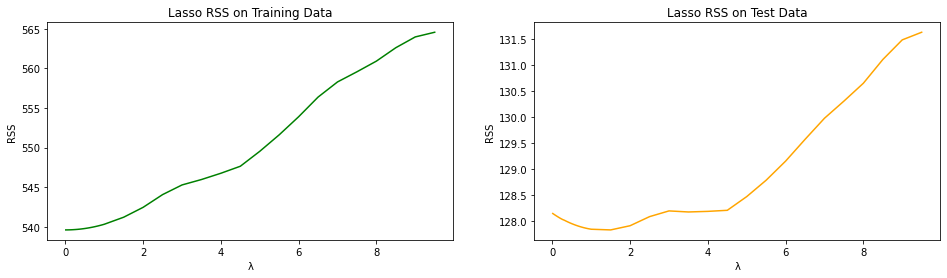

In [120]:
# plot the RSS_L2 on the training data
plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
plt.plot(λ_lst, train_lst_L1, color='green')
#plt.plot(λ_lst, test_lst_L2,label='test RSS')
plt.title('Lasso RSS on Training Data')
plt.ylabel('RSS')
plt.xlabel('λ')

# plot the RSS_L2 on the test data
plt.subplot(1, 2, 2)
plt.plot(λ_lst, test_lst_L1, color='orange')
plt.title('Lasso RSS on Test Data')
plt.ylabel('RSS')
plt.xlabel('λ')

Observe that the RSS on the training data increased steadily, but not as fast as ridge regression. The RSS on the test data first reached a local minimum and then increased steadily.

When it comes to regularization terms, the magnitude of the data should matter. Say we have a feature on a very small scale, then if the feature is actually influential, its weight would be relatively large. But since regularization terms penalize weight indiscriminately, that feature would not be as influential as it should be. 